# 20241122  

n=3, m=1 대변함

C:\Users\oth08\AppData\Local\Temp\ipykernel_17372\429258465.py:42: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X, Y, Z, shading='auto', cmap='seismic')


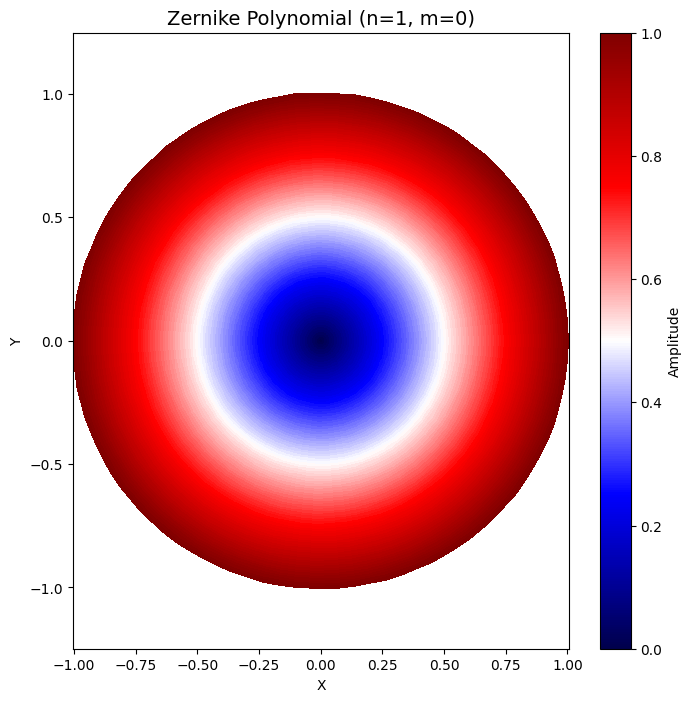

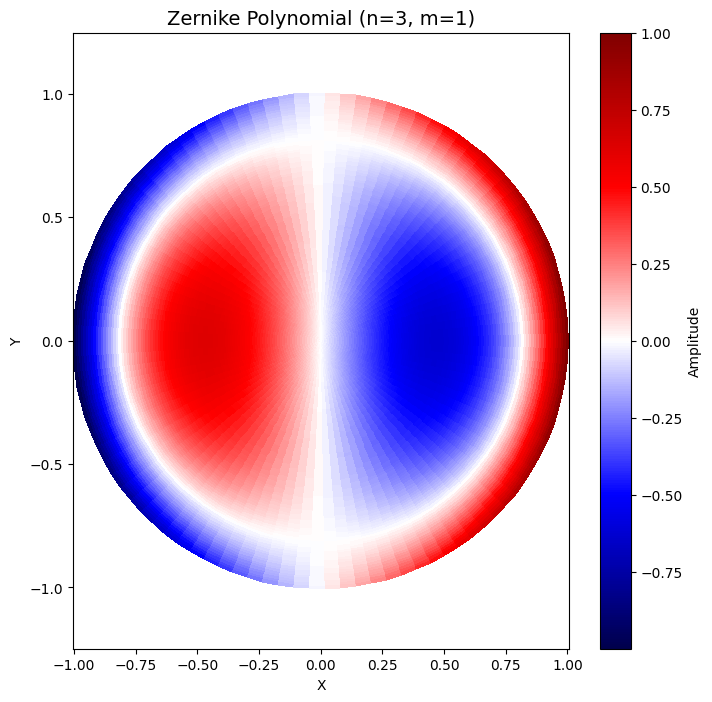

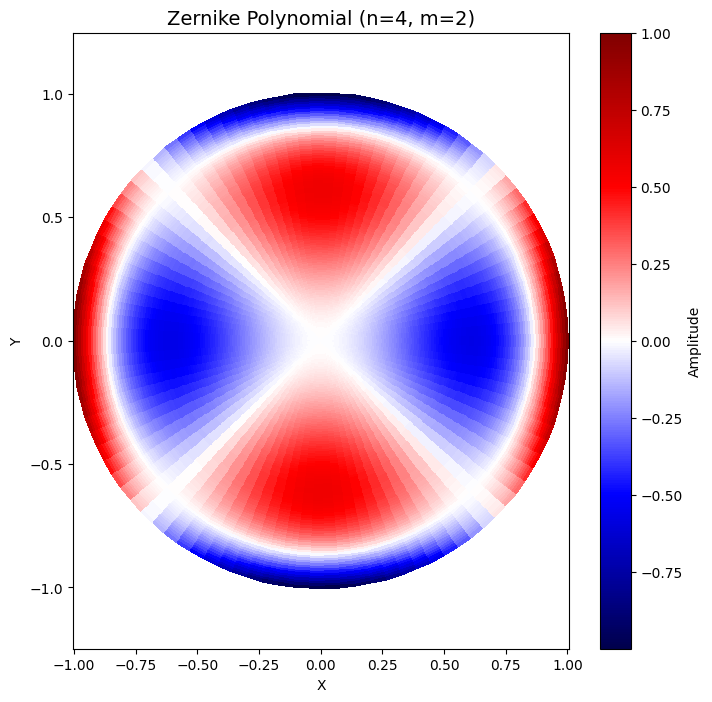

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# 저니케 반지름 다항식 정의
def zernike_radial(n, m, r):
    radial = np.zeros_like(r)
    for k in range((n - abs(m)) // 2 + 1):
        coef = (-1)**k * factorial(n - k) / \
               (factorial(k) * factorial((n + abs(m)) // 2 - k) * factorial((n - abs(m)) // 2 - k))
        radial += coef * r**(n - 2 * k)
    return radial

# 저니케 다항식 계산
def zernike(n, m, r, theta):
    radial = zernike_radial(n, m, r)
    if m > 0:
        return radial * np.cos(m * theta)
    elif m < 0:
        return radial * np.sin(-m * theta)
    else:
        return radial

# 저니케 다항식 시각화 함수
def visualize_zernike(n, m):
    # 극좌표 설정
    r = np.linspace(0, 1, 100)
    theta = np.linspace(0, 2 * np.pi, 100)
    R, Theta = np.meshgrid(r, theta)
    
    
    
    # 극좌표를 직교좌표로 변환
    X = R * np.cos(Theta)
    Y = R * np.sin(Theta)
    
    # 저니케 다항식 계산
    Z = zernike(n, m, R, Theta)
    
    # 시각화
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(X, Y, Z, shading='auto', cmap='seismic')
    plt.colorbar(label='Amplitude')
    plt.title(f'Zernike Polynomial (n={n}, m={m})', fontsize=14)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')
    plt.show()

# 예제: Zernike 다항식 시각화
visualize_zernike(1, 0)  # 예: n=2, m=0
visualize_zernike(3, 1)  # 예: n=3, m=1
visualize_zernike(4, 2)  # 예: n=4, m=2


# 20241122 

n=3, m=1  대변 못함


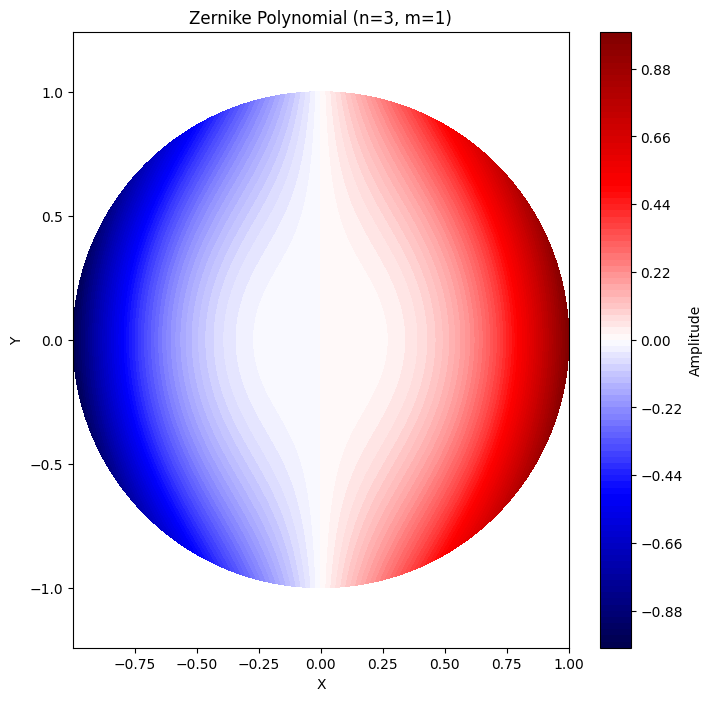

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_zernike(n, m):
    # 극좌표 설정 (해상도 증가)
    r = np.linspace(0, 1, 500)
    theta = np.linspace(0, 2 * np.pi, 500)
    R, Theta = np.meshgrid(r, theta)
    
    # Zernike 다항식 계산 (예시)
    Z = R**n * np.cos(m * Theta)  # 단순한 Zernike 다항식 표현
    
    # 데카르트 좌표로 변환
    X = R * np.cos(Theta)
    Y = R * np.sin(Theta)
    
    # 플롯
    plt.figure(figsize=(8, 8))
    plt.contourf(X, Y, Z, levels=100, cmap='seismic')
    plt.colorbar(label="Amplitude")
    plt.title(f"Zernike Polynomial (n={n}, m={m})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')
    plt.show()

# 테스트 실행 (n=1, m=0)
visualize_zernike(3, 1)
